<a href="https://colab.research.google.com/github/andregustavo04/Data-Science/blob/main/Previsao_Cancer_Pulmao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Inteligência Artificial para Diagnóstico de Câncer de Pulmão

O uso de tecnologia na área da saúde é algo que tende a occorer cada vez mais, seja para auxiliar em atividades do dia a dia, para oferecer tratamentos mais eficientes ou qualquer outra coisa. Quando se trata de inteligência artificial (IA), as possibilidades para aplicar esta tecnologia na área da saúde são inúmeras, e [especialistas de grandes empresas de tecnologia, tais como IBM e SAP](https://futurodasaude.com.br/inteligencia-artificial-na-medicina/), defendem o uso de técnicas de IA na área da saúde. O fato é que a inteligência artificial pode ajudar muito os profissionais do setor médico, principalemente no que se refere à parte de diagnósticos precoces. 

Tendo isso em mente, vamos construir um modelo de Machine Learning (IA) para fazer o diagnóstico de câncer de pulmão a partir de algumas características dos pacientes. Nosso objetivo aqui é criar um modelo capaz de fazer a previsão do câncer de pulmão em uma pessoa, a partir dos dados fornecidos sobre ela, e fazer o deploy deste modelo para uma página web. Os benefícios deste tipo de tecnologia são muitos, desde possibilitar um tratamento precoce, até permitir que pessoas possam criar uma noção da situação da sua saúde de forma muito rápida e procurar ajuda médica o quanto antes. 


<img src="https://cdn.midjourney.com/3bbce365-87c7-473a-991f-29fcf5fe266b/grid_0.png" height=200px >



## Objetivo
> Criar um modelo de Machine Learning capaz de fazer diagnóstico de câncer de pulmão.

## Métricas de Performance
> As métricas de performance para este modelo serão acurácia e f1 score, com uma atenção especial a esta última, devido ao desbalanaceamento característico de datasets da área da saúde.

<br>

📌O modelo em produção pode ser acessado por meio deste link: [modelo em produção](https://andregustavo04-lung-cancer-ml-app-zc8kg1.streamlit.app/).


# 2. Importando os Dados

Importação das bibliotecas que utilizaremos para fazer a análise dos dados.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

Atribuindo os dados a um DataFrame.

In [ ]:
file_path = '/content/drive/MyDrive/00 - Modelos de ML e Análises/ML - LUNG CANCER/survey lung cancer.csv'
df_full = pd.read_csv(file_path)

Com o comando `head()`, podemos ver as 5 primeiras linhas do DataFrame e começar a entender um pouco melhor sua estrutura.

In [ ]:
df_full.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


Para entendermos melhor as variáveis, segue o dicionário de variáveis.

* Gender: M(male), F(female)
* Age: Age of the patient
* Smoking: YES=2 , NO=1.
* Yellow fingers: YES=2 , NO=1.
* Anxiety: YES=2 , NO=1.
* Peer_pressure: YES=2 , NO=1.
* Chronic Disease: YES=2 , NO=1.
* Fatigue: YES=2 , NO=1.
* Allergy: YES=2 , NO=1.
* Wheezing: YES=2 , NO=1.
* Alcohol: YES=2 , NO=1.
* Coughing: YES=2 , NO=1.
* Shortness of Breath: YES=2 , NO=1.
* Swallowing Difficulty: YES=2 , NO=1.
* Chest pain: YES=2 , NO=1.
* Lung Cancer: YES , NO.

O DataFrame possui 309 linhas e 16 colunas.

In [ ]:
df_full.shape

(309, 16)

Para ver um breve resumos das estatísticas descritivas do nosso conjunto de dados, utilizaremos o método `describe()`.

In [ ]:
df_full.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


Como a maioria das colunas têm os números representando classes (o número 1 representa "NÃO" e o número 2 representa "SIM"), vamos nos ater à coluna da Idade (AGE). Repare que a média de idade dos pacientes é aproximadamente 63 anos, sendo o paciente mais jovem alguém que tem 21 anos, e o mais velho alguém que tem 87 anos. 

Ainda, note a seguir que não há nenhum valor missing em todo o DataFrame.

In [ ]:
df_full.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

# 3. Analisando os Dados

Agora, vamos analisar a distribuição das variáveis e as suas relações. Vamos começar analisando a distribuição da nossa variável target.

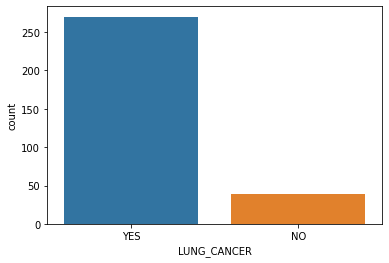

In [ ]:
_ = sns.countplot( x=df_full['LUNG_CANCER'])

Veja que estamos lidando com um Dataset extremamente desbalanceado (no Dataset, há muito mais pessoas que têm câncer do que pessoas que não têm), o que pode acabar nos causando certas complicações quando formos construir nosso modelo, nos forçando a utilizar técnicas de rebalanceamento de dados. 

Para analisar a dsitribuição das outras variáveis, vamos construir uma grande figura e plotar todos os gráficos nela. 

In [ ]:
# Criamos uma lista com todas as colunas do nosso data frame
lista = list(df_full.columns)

# Vamos remover as colunas que não iremos plotar nos gráficos
lista.remove('GENDER')
lista.remove('AGE')
lista.remove('PEER_PRESSURE')
lista.remove('LUNG_CANCER')

lista

['SMOKING',
 'YELLOW_FINGERS',
 'ANXIETY',
 'CHRONIC DISEASE',
 'FATIGUE ',
 'ALLERGY ',
 'WHEEZING',
 'ALCOHOL CONSUMING',
 'COUGHING',
 'SHORTNESS OF BREATH',
 'SWALLOWING DIFFICULTY',
 'CHEST PAIN']

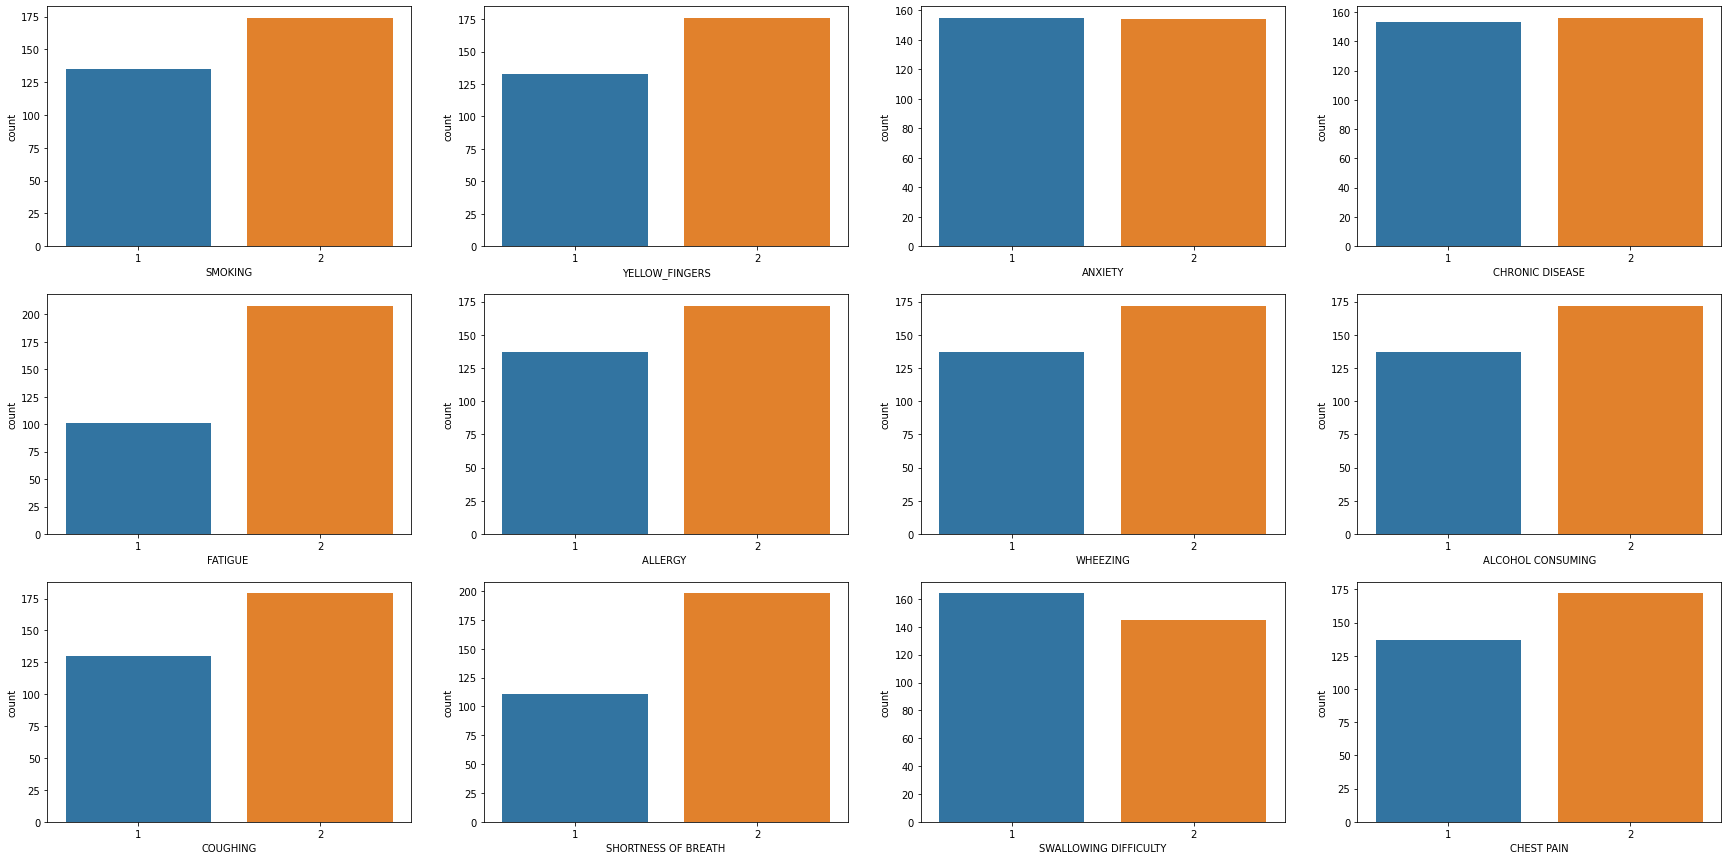

In [ ]:
# Criamos a nossa figura
figs, axes = plt.subplots(3, 4, figsize=(30, 15))
index = 0
for a in range(0, 3, 1):
  for b in range(0, 4, 1):
    _ = sns.countplot(x=df_full[lista[index]], ax=axes[a][b])
    index += 1

Outra coisa importante de ser feita é investigar a correlação entre as variáveis previsoras com a variável target. Para isso, utilizaremos uma treemap.

In [ ]:
lista_2 = list(df_full.columns)
lista_2.remove('LUNG_CANCER')
for item in lista_2:
  grafico = px.treemap(df_full, path=['LUNG_CANCER', item], title=item)
  grafico.show()

Obervando os gráficos acima, não conseguimos notar nehuma correlação significativa entre as variáveis e o diagnóstico positivo. Entretanto, há algumas variáveis que denotam alguma correlação relativamente interessante, são elas: Yellow Fingers, Fatigue e Shortness of Breath. 

# 4. PREPARAÇÃO DOS DADOS

In [ ]:
from sklearn.model_selection import train_test_split

Vamos separar nossas variáveis previsoras da nossa variável target.

In [ ]:
X = df_full.drop(columns=['LUNG_CANCER']) # variáveis previsoras
y = df_full['LUNG_CANCER'] # variável target

In [ ]:
X.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1


In [ ]:
y.head()

0    YES
1    YES
2     NO
3     NO
4     NO
Name: LUNG_CANCER, dtype: object

Vamos agora fazer a sepração dos dados em conjunto de treino e conjunto de teste. Esta sepração antes de começar a lidar com a transformação de variáveis categóricas ou de fazer o escalonamento dos dados é essencial para que não ocorra um data leakage por contaminação dos dados de treino, o que poderia levar a um overfitting indesejado. 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)

In [ ]:
X_train.shape, y_train.shape

((216, 15), (216,))

In [ ]:
X_test.shape, y_test.shape

((93, 15), (93,))

Com os dados separados em conjuntos de treino e teste, podemos começar o tratamento das variáveis categóricas (neste caso, apenas a coluna de gênero (GENDER)) e o escalonamento dos dados.

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

scaler = StandardScaler()
label_encoder_gender = LabelEncoder()

X_train['GENDER'] = label_encoder_gender.fit_transform(X_train['GENDER'])
X_test['GENDER'] = label_encoder_gender.transform(X_test['GENDER'])

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 1 -> M
# 0 -> F

Após aplicar o LabelEncoder na coluna "GENDER", a letra "M" virou 1, e a letra "F" virou 0. Além disso, veja como as variáveis previsoras "mudaram" bastante (foram padronizadas).

In [ ]:
X_train

array([[-1.02817453,  0.51057429, -1.09730654, ...,  0.75180941,
        -0.96362411, -1.11803399],
       [-1.02817453, -0.90332374,  0.91132238, ..., -1.33012434,
         1.03774904,  0.89442719],
       [ 0.97259753, -2.44575795, -1.09730654, ...,  0.75180941,
         1.03774904,  0.89442719],
       ...,
       [-1.02817453, -1.54600466,  0.91132238, ...,  0.75180941,
         1.03774904, -1.11803399],
       [-1.02817453,  0.12496573,  0.91132238, ..., -1.33012434,
         1.03774904,  0.89442719],
       [ 0.97259753, -0.90332374, -1.09730654, ..., -1.33012434,
        -0.96362411, -1.11803399]])

# 5. Testando Diferentes Modelos - Dados Desbalanceados

Para começarmos a modelagem dos dados, vamos, primeiro, fazer o teste de vários modelos distintos, com os dados ainda desbalanceados. A ideia é que possamos fazer a comparação deste teste com os dados desbalanceados com o próximo teste, no qual os dados estarão balanceados. 

Vamos fazer a imoprtação de todos os modelos que utilizaremos, e de todas as métricas de avaliação que precisaremos. Ainda, precisamos importar a função `cross_validate`, que nos auxiliará neste processo de teste. 

In [ ]:
# Imoprtando modelos
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

# Importando métricas para avaliação dos modelos
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, precision_recall_fscore_support, f1_score
from sklearn.metrics import make_scorer

# Importando o método de validação cruzada
from sklearn.model_selection import cross_validate

Como estamos fazendo uma validação cruzada, precisamos dos dados inteiros, sem estarem separados em conjunto de teste e conjunto de treino. Precisamos dos dados assim pois a própria função de validação cruzada (cross validation) se encarregará de fazer a divisão entre treino e teste. 

In [ ]:
scaler_2 = StandardScaler()
label_encoder_gender_2 = LabelEncoder()

X_cv = X.copy()
y_cv = y.copy()

X_cv['GENDER'] = label_encoder_gender_2.fit_transform(X_cv['GENDER'])

X_cv = scaler_2.fit_transform(X_cv)
# 1 -> M
# 0 -> F

Agora que já temos os dados no formato em que precisamos, vamos criar de fato a validação cruzada, passando como parâmetros de avaliação a acurácia e o f1 score. 

In [ ]:
scoring = {"accuracy": make_scorer(accuracy_score), "fscore" : make_scorer(f1_score, average="macro")}

modelos = [DecisionTreeClassifier(random_state=0), RandomForestClassifier(random_state=0), SVC(random_state=0), 
           KNeighborsClassifier(), XGBClassifier(random_state=0), LogisticRegression(random_state=0)]

modelos_labels = ["Decision Tree", "Random Forest", "SVM", "KNN", "XGBoost", "Logistic Regression"]
idx = 0
modelos_dict_cv = {}

for modelo in modelos:
  model = modelo

  scores = cross_validate(model, X_cv, y_cv, scoring=scoring, cv=5)
  modelos_dict_cv[modelos_labels[idx]] = {"Acurácia":scores["test_accuracy"], "F1 Score": scores["test_fscore"]}
  idx += 1 

Com a validação cruzada concluída, vamos analisar os resultados que cada modelo obteve. 

In [ ]:
for i in modelos_dict_cv:
  print(i)
  print()
  print(f"Acurácia: {modelos_dict_cv[i]['Acurácia'].mean()}")
  print(f"F1 Score: {modelos_dict_cv[i]['F1 Score'].mean()}")
  print() 

Decision Tree

Acurácia: 0.8835536753040719
F1 Score: 0.7322230570943715

Random Forest

Acurácia: 0.9224219989423584
F1 Score: 0.8156360339379207

SVM

Acurácia: 0.9126916975145425
F1 Score: 0.7799603096126515

KNN

Acurácia: 0.8867794817556849
F1 Score: 0.7072128597128596

XGBoost

Acurácia: 0.899788471708091
F1 Score: 0.7578895081093023

Logistic Regression

Acurácia: 0.9159175039661556
F1 Score: 0.7895174566999745



# 6. Testando Diferentes Modelos - Dados Balanceados

Já fizemos os teste sem balancear os dados, e obtivemos valores baixos para f1 score, o que nos sugere que os modelos estão com problemas para fazer a classificação correta para valores da classe minoritária (classe "NO", dos pacientes que não têm câncer).

Para resolver este problema, vamos rebalancear os dados, utilizando a técnica SMOTE (Synthetic Minority Oversampling Technique). Contudo, ainda iremos continuar utilizando uma validação cruzada.

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import KFold

def smote_cross_validation(modelo, X, y):
  acuracias = []
  f1_scores = []
  
  kfold = KFold(n_splits=5)

  scaler = StandardScaler()
  label_encoder_gender = LabelEncoder()

  X_smote = X.copy()
  y_smote = y.copy()

  X_smote['GENDER'] = label_encoder_gender.fit_transform(X_smote['GENDER'])

  X_smote = scaler.fit_transform(X_smote)
  # 1 -> M
  # 0 -> F

  sm = SMOTE(random_state=0, sampling_strategy=0.5)

  for (idx_train, idx_test) in kfold.split(X):
    X_split_train = X_smote[idx_train]
    y_split_train = y_smote[idx_train]

    X_split_test = X_smote[idx_test]
    y_split_test = y_smote[idx_test]

    X_split_train, y_split_train = sm.fit_resample(X_split_train, y_split_train)

    modelo.fit(X_split_train, y_split_train)

    p = modelo.predict(X_split_test)

    acc = accuracy_score(y_split_test, p)
    f1_score_smote = f1_score(y_split_test, p, average='macro')
    class_report = classification_report(y_split_test, p)
    
    acuracias.append(acc)
    f1_scores.append(f1_score_smote)
  
  return np.array([acuracias]).mean(), np.array([f1_scores]).mean(), class_report


Note que precisamos criar uma função para fazer a validação cruzada de forma um tanto quanto "manual". Tivemos que fazer isso para que não ocorresse um "data leakage", visto que se os dados fossem rebalanceados por completo, antes da divisão entre treino e teste, durante a validação cruzada os dados de teste não simulariam "dados do mundo real", que tendem a vir desbalanceados.   

In [ ]:
modelos_smote = [DecisionTreeClassifier(random_state=0), RandomForestClassifier(random_state=0), SVC(random_state=0), 
           KNeighborsClassifier(), XGBClassifier(random_state=0), LogisticRegression(random_state=0)]

modelos_labels_smote = ["Decision Tree", "Random Forest", "SVM", "KNN", "XGBoost", "Logistic Regression"]
idx = 0
modelos_dict_smote = {}

for modelo in modelos_smote:
  model = modelo
  
  acc, f1_score_smote, class_report = smote_cross_validation(model, X, y)
  
  
  modelos_dict_smote[modelos_labels_smote[idx]] = {"Acurácia":acc, "F1 Score": f1_score_smote, "Classification Report": class_report}
  idx += 1 

Vamos ver os resultados da validação cruzada feita em cima dos dados já balanceados. 

In [ ]:
for i in modelos_dict_smote:
  print(i)
  print()
  print(f"Acurácia: {modelos_dict_smote[i]['Acurácia'].mean()}")
  print(f"F1 Score: {modelos_dict_smote[i]['F1 Score'].mean()}")
  print(f"Classification Report:")
  print(modelos_dict_smote[i]['Classification Report'])
  print() 
  print()

Decision Tree

Acurácia: 0.8771020624008461
F1 Score: 0.7100133015133014
Classification Report:
              precision    recall  f1-score   support

          NO       0.75      0.60      0.67        10
         YES       0.92      0.96      0.94        51

    accuracy                           0.90        61
   macro avg       0.84      0.78      0.80        61
weighted avg       0.90      0.90      0.90        61



Random Forest

Acurácia: 0.9095187731359069
F1 Score: 0.7564430732666028
Classification Report:
              precision    recall  f1-score   support

          NO       1.00      0.70      0.82        10
         YES       0.94      1.00      0.97        51

    accuracy                           0.95        61
   macro avg       0.97      0.85      0.90        61
weighted avg       0.95      0.95      0.95        61



SVM

Acurácia: 0.8933368588048651
F1 Score: 0.7318032216825321
Classification Report:
              precision    recall  f1-score   support

         

Com base nos resultados obtidos, já podemos ver, em todos os modelos, um aumento significativo na capacidade de classificar as entradas da classe minoritária. Entretanto, há três modelos que se sobressaíram e que investigaremos mais profundamente a seguir: Logistic Regression, KNN e Random Forest Classifier. 

# 7. Testando Novamente os Melhores Modelos

Para fazer o teste dos três melhores modelos, vamos criar uma função que faz uma validação cruzada com os dados rebalanceados.

Em cada modelo, poderemos enxergar a acurácia, o f1_score, o classification report e os índices de treino e teste de cada modelo. 

In [ ]:
def smote_cross_validation_idx(modelo, X, y):
  acuracias = {}
  f1_scores = {}
  reports = {}
  indices = {}
  modelos = {}

  accs_list = []
  f1scores_list = []
  
  kfold = KFold(n_splits=6)

  scaler = StandardScaler()
  label_encoder_gender = LabelEncoder()

  X_smote = X.copy()
  y_smote = y.copy()

  X_smote['GENDER'] = label_encoder_gender.fit_transform(X_smote['GENDER'])

  X_smote = scaler.fit_transform(X_smote)
  # 1 -> M
  # 0 -> F

  sm = SMOTE(random_state=0, sampling_strategy=0.5)

  for i, (idx_train, idx_test) in enumerate(kfold.split(X)):
    X_split_train = X_smote[idx_train]
    y_split_train = y_smote[idx_train]

    X_split_test = X_smote[idx_test]
    y_split_test = y_smote[idx_test]

    X_split_train, y_split_train = sm.fit_resample(X_split_train, y_split_train)

    modelo.fit(X_split_train, y_split_train)

    p = modelo.predict(X_split_test)

    acc = accuracy_score(y_split_test, p)
    f1_score_smote = f1_score(y_split_test, p, average='macro')
    class_report = classification_report(y_split_test, p)
    
    accs_list.append(acc)
    f1scores_list.append(f1_score_smote)

    acuracias[i] = acc
    f1_scores[i] = f1_score_smote
    reports[i] = class_report
    indices[i] = {"treino": idx_train, "teste": idx_test}
    modelos[i] = modelo
  
  return acuracias, f1_scores, reports, indices, modelos, scaler, np.array([accs_list]).mean(), np.array([f1scores_list]).mean()

## Logistic Regression

In [ ]:
dicionario = {}
lr_model = LogisticRegression(random_state=0)
acc, f1_score_smote, class_report, indices, modelos, lr_scaler, acc_mean, f1_score_mean = smote_cross_validation_idx(lr_model, X, y)

print("LOGISTIC REGRESSION")
print(f"Acurácia: {acc_mean}")
print(f"F1 Score: {f1_score_mean}")
print("\n" * 3)

for i in range(0, 6):
  dicionario[i] = {"Acurácia":acc[i], "F1 Score": f1_score_smote[i], "Classification Report": class_report[i], "Indices": indices[i], "Modelo":modelos[i]}
  print(i)
  print(acc[i])
  print(f1_score_smote[i])
  print(class_report[i])
  print(indices[i])

LOGISTIC REGRESSION
Acurácia: 0.9127073906485671
F1 Score: 0.8057445637589439




0
0.8653846153846154
0.8156962025316457
              precision    recall  f1-score   support

          NO       0.90      0.60      0.72        15
         YES       0.86      0.97      0.91        37

    accuracy                           0.87        52
   macro avg       0.88      0.79      0.82        52
weighted avg       0.87      0.87      0.86        52

{'treino': array([ 52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148,

## K-Nearest Neighbors

In [ ]:
knn_model = KNeighborsClassifier()

knn_dicionario = {}

acc_knn, f1_score_smote_knn, class_report_knn, indices_knn, modelos_knn, knn_scaler, acc_knn_mean, f1_score_knn_mean = smote_cross_validation_idx(knn_model, X, y)

print("K-Nearest Neighbors")
print(f"Acurácia: {acc_knn_mean}")
print(f"F1 Score: {f1_score_knn_mean}")
print("\n" * 3)
  
for i in range(0, 6):
  knn_dicionario[i] = {"Acurácia":acc_knn[i], "F1 Score": f1_score_smote_knn[i], "Classification Report": class_report_knn[i], "Indices": indices_knn[i], "Modelo":modelos[i]}
  print(i)
  print(acc_knn[i])
  print(f1_score_smote_knn[i])
  print(class_report_knn[i])
  print(indices_knn[i])

K-Nearest Neighbors
Acurácia: 0.8545123177476119
F1 Score: 0.728284653714443




0
0.8076923076923077
0.7435897435897436
              precision    recall  f1-score   support

          NO       0.73      0.53      0.62        15
         YES       0.83      0.92      0.87        37

    accuracy                           0.81        52
   macro avg       0.78      0.73      0.74        52
weighted avg       0.80      0.81      0.80        52

{'treino': array([ 52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 

## Random Forest



In [ ]:
random_forest_model = RandomForestClassifier(random_state=0, max_depth=5)

random_dicionario = {}

acc_random, f1_score_smote_random, class_report_random, indices_random, modelos_random, random_scaler, acc_random_mean, f1_score_random_mean = smote_cross_validation_idx(random_forest_model, X, y)

print("Support Vector Machines")
print(f"Acurácia: {acc_random_mean}")
print(f"F1 Score: {f1_score_random_mean}")
print("\n" * 3)
  
for i in range(0, 6):
  random_dicionario[i] = {"Acurácia":acc_random[i], "F1 Score": f1_score_smote_random[i], "Classification Report": class_report_random[i], "Indices": indices_random[i], "Modelo":modelos[i]}
  print(i)
  print(acc_random[i])
  print(f1_score_smote_random[i])
  print(class_report_random[i])
  print(indices_random[i])

Support Vector Machines
Acurácia: 0.912770236299648
F1 Score: 0.7973492456387814




0
0.8269230769230769
0.7314974182444063
              precision    recall  f1-score   support

          NO       1.00      0.40      0.57        15
         YES       0.80      1.00      0.89        37

    accuracy                           0.83        52
   macro avg       0.90      0.70      0.73        52
weighted avg       0.86      0.83      0.80        52

{'treino': array([ 52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 1

# 8. Salvando o Melhor Modelo

Comprando os resultados de todos os modelos, observamos que o melhor modelo foi o quinto modelo da validação cruzada da Regressão Logística (Logistic Regression), então é ele que utilizaremos em nosso ambiente de produção.

Vamos salvar nosso modelo em um arquivo .pkl para podermos utilizá-lo no ambiente de produção. 

In [ ]:
import pickle
lr_final_model = dicionario[4]['Modelo']
data = {"model": lr_final_model, "scaler":lr_scaler}

with open('/content/drive/MyDrive/00 - Modelos de ML e Análises/ML - LUNG CANCER/logistic_regression_model.pkl', 'wb') as f:
	pickle.dump(data, f)

Para testar nosso arquivo contendo nosso modelo e o objeto responsável por fazer o escalonamento dos dados no ambiente de produção, faremos uma predição com uma entrada aleatória, apenas para verificar se conseguimos de fato utilizar tanto o modelo quanto o objeto para escalonamento.

In [ ]:
with open('/content/drive/MyDrive/00 - Modelos de ML e Análises/ML - LUNG CANCER/logistic_regression_model.pkl', 'rb') as file:
	data = pickle.load(file)

model_loaded = data['model']
scaler_loaded = data['scaler']

valor = scaler_loaded.transform(np.array([[0, 38, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1]]))
pred = model_loaded.predict(valor)
pred

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



array(['NO'], dtype=object)

Como podemos observar, conseguimos fazer a previsão a partir do arquivo "logistic_regression_model.pkl". 

# 9. Considerações Finais

Como dito no começo deste notebook, modelos de machine learning que auxiliam profissionais da área da saúde em suas tarefas tendem a se tornar algo cada vez mais recorrente, devido à potencialização de resultados que a IA pode trazer para a saúde de maneira geral. Um ótimo exemplo é justamente este modelo que acabamos de construir, que ajuda a identificar pacientes com câncer de pulmão. 

Um modelo de machine learning semelhante ao que construímos aqui poderia ser usado para auxiliar médicos a fazerem diagnósticos mais precisos, ou ao menos investigar pacientes que, aparentemente, não demonstram nenhum sinal significativo de câncer. Da mesma forma, é possível que pacientes utilizem o modelo para poderem procurar ajuda médica de forma precoce, podendo tomar as devidas ações para preservar sua saúde o mais rápido possível. 

É claro que, para haver um modelo realmente capaz de fazer o diagnóstico de câncer, haveria a necessidade de mais dados. Entretanto, o modelo aqui construído é um ótimo exemplo do que é possível de ser feito. Nosso modelo final possui uma acurácia de aproximadamente 96%, ou seja, ele tende a acertar em 96% das previsões que faz. Pode-se considerar uma acurácia positiva, dada a pontuação de f1 score relativamente satisfatória também (aproximadamente 91%).

Caso deseje ver o modelo acabamos de criar em produção, acesse o link a seguir: [modelo em produção](https://andregustavo04-lung-cancer-ml-app-zc8kg1.streamlit.app/).

### Informações Sobre o Modelo Final

Acurácia: 96,08%

F1 Score: 90,56%




In [ ]:
print(f"Acurácia: {dicionario[4]['Acurácia']}")

Acurácia: 0.9607843137254902


In [ ]:
print(f"F1 Score: {dicionario[4]['F1 Score']}")

F1 Score: 0.9055555555555554


In [ ]:
print(dicionario[4]["Classification Report"])

              precision    recall  f1-score   support

          NO       0.71      1.00      0.83         5
         YES       1.00      0.96      0.98        46

    accuracy                           0.96        51
   macro avg       0.86      0.98      0.91        51
weighted avg       0.97      0.96      0.96        51

